<a href="https://colab.research.google.com/github/harkpun/Google-Play-Store-Analysis/blob/main/Play_Store_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# mounting on drive
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [4]:
# reading both CSV Files From Drive and storing in dataframe
ps_df = pd.read_csv('/content/mydrive/MyDrive/AlmaBetter/Capstone Project - EDA/Play Store Data.csv')
ur_df = pd.read_csv('/content/mydrive/MyDrive/AlmaBetter/Capstone Project - EDA/User Reviews.csv')

In [5]:
from pandas_profiling import ProfileReport
profile = ProfileReport(ps_df, title='pandas profile report', html={'style':{'full_width':True}})

In [6]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
# number of rows and column present in play store dataset
ps_df.shape

(10841, 13)

In [5]:
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
ps_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [7]:
ps_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [8]:
ps_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [9]:
# number of null values present in dataset
ps_df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

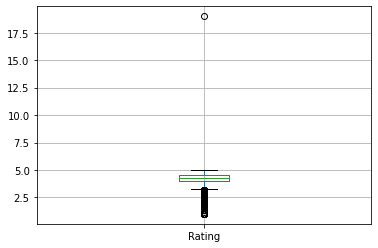

In [10]:
# checking for the oulier 
ps_df.boxplot()

In [11]:
# checking how many rating are more than 5 outlier
ps_df[ps_df.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [12]:
# deleting outlier row to getting proper insights from dataframe
ps_df.drop([10472], inplace=True)

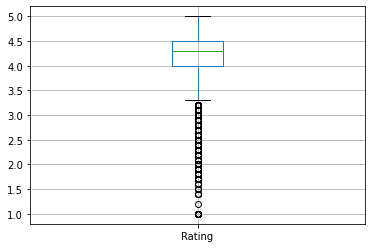

In [13]:
ps_df.boxplot()

In [14]:
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


Converting
* Reviews
* Size
* Installs
* Price 

to numeric.

In [15]:
# converting Reviews column to numeric from object.
ps_df['Reviews'] = ps_df['Reviews'].astype(int)

In [16]:
ps_df.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [17]:
# converting Price column to numeric from object
ps_df['Price'] = ps_df['Price'].apply(lambda x : str(x).replace('$','') if '$' in str(x) else str(x))
ps_df['Price'] = ps_df['Price'].apply(lambda x: float(x))

In [18]:
ps_df.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [19]:
ps_df['Installs'] = ps_df['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))
ps_df['Installs'] = ps_df['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))
ps_df['Installs'] = ps_df['Installs'].apply(lambda x: float(x))

In [20]:
ps_df.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [21]:
# converting all the data to Mb
for data in ps_df['Size']:
  if 'M' in str(data):
    new_data = float(data[:-1])
    ps_df['Size'] = ps_df['Size'].replace(data,new_data)
    
  elif 'k' in str(data):
    new_data = float(data[:-1])/1000
    ps_df['Size'] = ps_df['Size'].replace(data,new_data)


# converting Size column to numeric from object
ps_df['Size'] = ps_df['Size'].replace("Varies with device",np.nan)
ps_df['Size'] = pd.to_numeric(ps_df['Size'])

In [22]:
ps_df.Size.unique()

array([1.90e+01, 1.40e+01, 8.70e+00, 2.50e+01, 2.80e+00, 5.60e+00,
       2.90e+01, 3.30e+01, 3.10e+00, 2.80e+01, 1.20e+01, 2.00e+01,
       2.10e+01, 3.70e+01, 2.70e+00, 5.50e+00, 1.70e+01, 3.90e+01,
       3.10e+01, 4.20e+00, 7.00e+00, 2.30e+01, 6.00e+00, 6.10e+00,
       4.60e+00, 9.20e+00, 5.20e+00, 1.10e+01, 2.40e+01,      nan,
       9.40e+00, 1.50e+01, 1.00e+01, 1.20e+00, 2.60e+01, 8.00e+00,
       7.90e+00, 5.60e+01, 5.70e+01, 3.50e+01, 5.40e+01, 2.01e-01,
       3.60e+00, 5.70e+00, 8.60e+00, 2.40e+00, 2.70e+01, 2.50e+00,
       1.60e+01, 3.40e+00, 8.90e+00, 3.90e+00, 2.90e+00, 3.80e+01,
       3.20e+01, 5.40e+00, 1.80e+01, 1.10e+00, 2.20e+00, 4.50e+00,
       9.80e+00, 5.20e+01, 9.00e+00, 6.70e+00, 3.00e+01, 2.60e+00,
       7.10e+00, 3.70e+00, 2.20e+01, 7.40e+00, 6.40e+00, 3.20e+00,
       8.20e+00, 9.90e+00, 4.90e+00, 9.50e+00, 5.00e+00, 5.90e+00,
       1.30e+01, 7.30e+01, 6.80e+00, 3.50e+00, 4.00e+00, 2.30e+00,
       7.20e+00, 2.10e+00, 4.20e+01, 7.30e+00, 9.10e+00, 5.50e

In [23]:
#Converting data in Last Updated column from string to Timestamp.
ps_df['Last Updated'] = pd.to_datetime(ps_df['Last Updated'])

In [24]:
ps_df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [25]:
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  float64       
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 1.2+ MB


# **Data Imputation**

**For 'Rating' and 'Size' column the best way to replace the NaN values is to replace them with the mean of the Rating and Size for each category.** 
**For e.g. - If NaN is present in certain row under Size which belongs to the category FAMILY then this NaN will be replaced by the mean of the app Size which belongs to the FAMILY category.**
**So we are replacing the NaN values based on the mean grouped by 'Category'.**

In [26]:
# Defining the function to replace the NaN value.
def filling_null_values_for_numerical_columns(col):
  ps_df[col].fillna(ps_df.groupby('Category')[col].transform('mean'), inplace = True)


# Replacing the NaN values from 'Rating' and 'Size'.
for column in ['Rating', 'Size']:
  filling_null_values_for_numerical_columns(column)

In [27]:
# filling null values with mode for categorical data
print(ps_df['Type'].mode())
print(ps_df['Current Ver'].mode())
print(ps_df['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [28]:
# function for imputing mode
def impute_mode(series):
  return series.fillna(str(series.mode()))

In [29]:
ps_df['Type'] = impute_mode(ps_df['Type'])

In [30]:
ps_df['Current Ver'] = impute_mode(ps_df['Current Ver'])

In [31]:
ps_df['Android Ver'] = impute_mode(ps_df['Android Ver'])

In [32]:
ps_df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [33]:
ps_df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
60,CityBus Lviv,AUTO_AND_VEHICLES,4.600000,534,5.70000,10000.0,Free,0.0,Everyone,Auto & Vehicles,2018-07-08,1.9.1,4.0.3 and up
8441,DiskDigger photo recovery,TOOLS,4.200000,227798,8.77125,50000000.0,Free,0.0,Everyone,Tools,2018-08-06,Varies with device,Varies with device
9077,junainfo.dy.fi,TRAVEL_AND_LOCAL,4.109292,8,1.90000,100.0,Free,0.0,Everyone,Travel & Local,2015-10-21,0.0.9,4.0 and up
4876,AB Blast Match 3,FAMILY,4.300000,111,48.00000,10000.0,Free,0.0,Everyone,Puzzle,2018-06-19,1.13,4.1 and up
225,Secure Folder,BUSINESS,3.800000,14760,8.60000,50000000.0,Free,0.0,Everyone,Business,2018-01-31,1.1.07.6,7.0 and up


In [34]:
ps_df.describe()

,Rating,Reviews,Size,Installs,Price
count,10840.000000,1.084000e+04,10840.000000,1.084000e+04,10840.000000
mean,4.190454,4.441529e+05,21.209958,1.546434e+07,1.027368
std,0.480075,2.927761e+06,21.054756,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.008500,0.000000e+00,0.000000
25%,4.047411,3.800000e+01,5.900000,1.000000e+03,0.000000
50%,4.259664,2.094000e+03,14.472162,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,28.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


In [35]:
ps_df.Reviews.sum()

4814617393

# **Data Cleaning**

In [36]:
ps_df['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9659, dtype: int64

**From the above data we can infer that there are lots of duplicate values for the same app. To remove the duplicate values we will first sort the dataframe by 'Last Updated' date in descending order then we will remove the duplicates. In this way we will have the information for the latest entry in the database.**

In [37]:
# for example ROBLOX app either should be from game category or family catagory and also present duplicate value.
ps_df[ps_df['App'] == 'ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67.0,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67.0,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67.0,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67.0,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67.0,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67.0,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67.0,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67.0,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67.0,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up


In [38]:
#Sorting the dataset in descending order of Last Updated date.
ps_df.sort_values(by = 'Last Updated', ascending = False, inplace = True)

In [39]:
# Deleting the duplicate entries of App.
ps_df.drop_duplicates(subset = ['App'], inplace = True)

**Checking the number of null values in user_review dataframe.**

In [40]:
ur_df.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [41]:
#Removing all the NaN value rows from user_review dataframe.
ur_df.dropna(inplace = True)

In [42]:
ur_df.isna().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [43]:
ur_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [44]:
ur_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37427.000000,37427.000000
mean,0.182171,0.492770
std,0.351318,0.259904
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [45]:
ps_df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10098,Ey Sey Storytime រឿងនិទានតាឥសី,FAMILY,4.700,1327,44.0,10000.0,Free,0.0,Everyone,Education;Education,2017-05-18,1.2.2,4.0.3 and up
2182,Elmo Calls by Sesame Street,FAMILY,3.900,6903,25.0,1000000.0,Free,0.0,Everyone,Educational;Pretend Play,2018-01-31,2.0.7,2.3 and up
1345,Yoga Studio: Mind & Body,HEALTH_AND_FITNESS,4.300,5499,94.0,100000.0,Free,0.0,Everyone,Health & Fitness,2018-07-23,2.0.16,4.1 and up
6434,Skywatch BL,WEATHER,4.244,15,10.0,1000.0,Free,0.0,Everyone,Weather,2017-02-20,1.1.6,4.4 and up
1151,Citizens Bank Mobile Banking,FINANCE,4.100,15192,38.0,1000000.0,Free,0.0,Everyone,Finance,2018-05-23,4.2.1,4.1 and up


## **Graph 1 - Category wise number of apps.**

In [46]:
ps_df.Category.nunique()

33

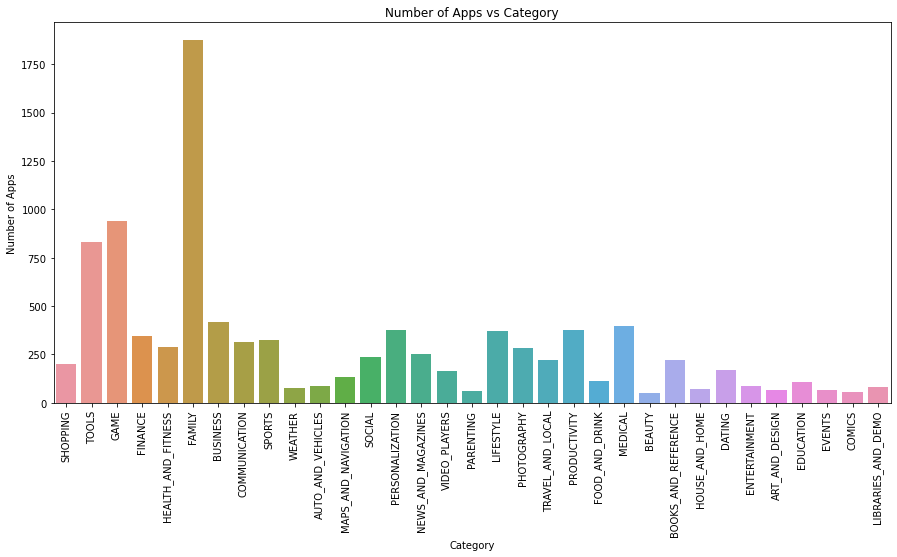

In [47]:
#Plotting Number of Apps vs Category.
plt.figure(figsize=(15,7))
plt.title("Number of Apps vs Category")
sns.countplot(x = 'Category', data = ps_df)
plt.xlabel("Category")
plt.ylabel("Number of Apps")
plt.xticks(rotation = 90)
plt.show()

**The above graph shows that the category 'FAMILY' has the most number of apps.**

In [48]:
# Checking the top 5 categories which have most number of apps.
cat_count_df = ps_df.groupby(['Category'])['Category'].count().reset_index(name = 'count')
cat_count_df.sort_values(by ='count', ascending = False, inplace = True)
cat_count_df.head()

,Category,count
11,FAMILY,1873
14,GAME,942
29,TOOLS,829
4,BUSINESS,419
20,MEDICAL,395


**So, from the above data we can infer that the Top 5 category in the play store which have most number of apps are - FAMILY, GAME, TOOLS, BUSINESS & MEDICAL.**

## **Graph 2 - Category wise number of installs.**

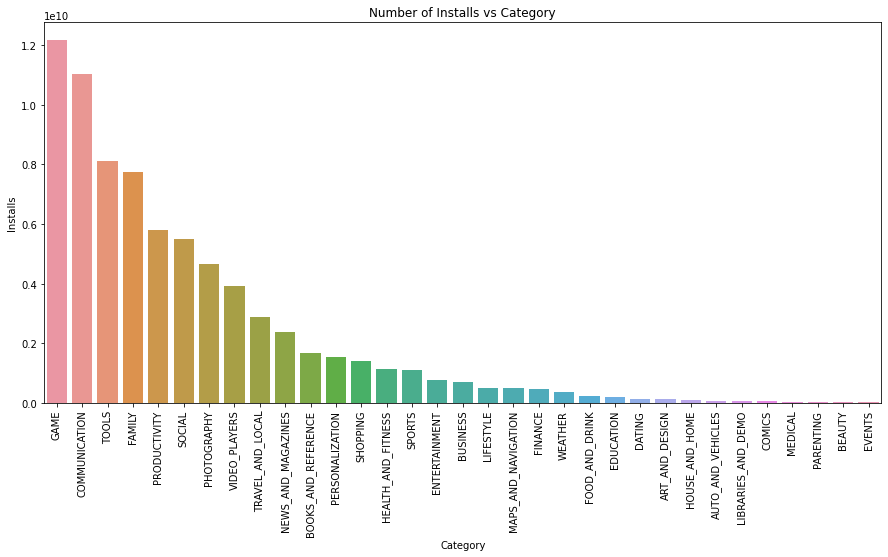

In [49]:
#Plotting Number of Installs vs Category.
cat_install_df = ps_df.groupby(['Category'])[['Installs']].sum().reset_index()
cat_install_df.sort_values(by = 'Installs', ascending = False, inplace = True)
plt.figure(figsize=(15,7))
plt.title("Number of Installs vs Category")
sns.barplot(x = 'Category', y = 'Installs', data = cat_install_df)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.xticks(rotation = 90)
plt.show()

**From the above graph we can infer that the top 5 categories with most number of installs are - GAME, COMMUNICATION, TOOLS, FAMILY and PRODUCTIVITY.**

In [50]:
#Top 5 categories with most number of installs -
cat_install_df.head()

,Category,Installs
14,GAME,1.216292e+10
6,COMMUNICATION,1.103928e+10
29,TOOLS,8.102772e+09
11,FAMILY,7.739442e+09
25,PRODUCTIVITY,5.788091e+09


## **Graph 3 - Violin Graph to show Distribution of Rating**

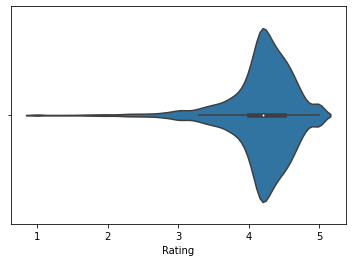

In [51]:
#Plotting Violin Graph.
sns.violinplot(x = ps_df['Rating'], data = ps_df)
plt.show()

**From the above Violin graph we can infer that most of the apps are rated between 4 to 5.**

## **Graph 4 - Box plot to show Rating vs Category**

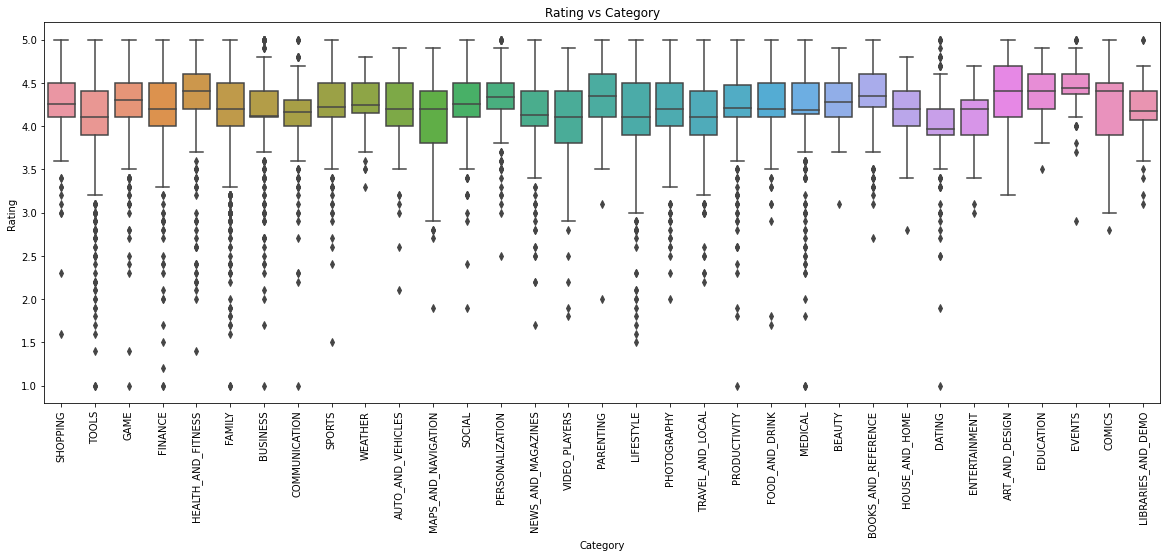

In [52]:
#Plotting box plot for Rating vs Category.
plt.figure(figsize=(20,7))
sns.boxplot(x = ps_df['Category'], y = ps_df['Rating'], data = ps_df, orient = 'v')
plt.title("Rating vs Category")
plt.xlabel("Category")
plt.ylabel("Rating")
plt.xticks(rotation = 90)
plt.show()

In [53]:
# Checking the top 5 categories with highest rating.
cat_rat_df = ps_df.groupby(['Category'])['Rating'].median().reset_index(name = 'median')
cat_rat_df.sort_values(by ='median', ascending = False, inplace = True)
cat_rat_df.head()

,Category,median
10,EVENTS,4.435556
0,ART_AND_DESIGN,4.400000
5,COMICS,4.400000
8,EDUCATION,4.400000
15,HEALTH_AND_FITNESS,4.400000


**The Top 5 Category with highest ratings are - EVENTS, ART_AND_DESIGN, COMICS, EDUCATION, HEALTH_AND_FITNESS.**

In [54]:
#Checking 5 categories with worst rating.
cat_rat_df.tail()

,Category,median
30,TRAVEL_AND_LOCAL,4.109292
18,LIFESTYLE,4.100000
29,TOOLS,4.100000
31,VIDEO_PLAYERS,4.100000
7,DATING,3.970769


## **Graph 5 - Number of Apps vs Genres**

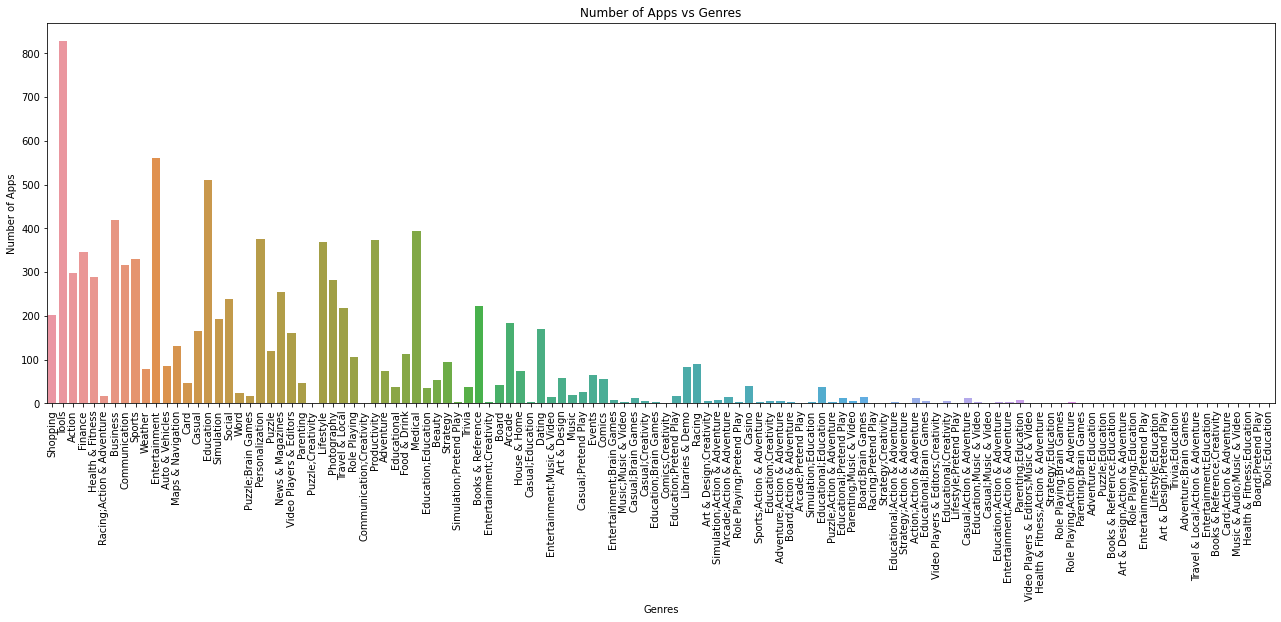

In [55]:
#Plotting Number of apps vs Genres.
plt.figure(figsize=(22,7))
plt.title("Number of Apps vs Genres")
sns.countplot(x = 'Genres', data = ps_df)
plt.xlabel("Genres")
plt.ylabel("Number of Apps")
plt.xticks(rotation = 90)
plt.show()

In [56]:
# Checking the top 5 Genres which have most number of apps.
gen_count_df = ps_df.groupby(['Genres'])['Genres'].count().reset_index(name = 'count')
gen_count_df.sort_values(by ='count', ascending = False, inplace = True)
gen_count_df.head()

,Genres,count
107,Tools,828
51,Entertainment,561
38,Education,510
22,Business,419
70,Medical,395


**Top 5 Genres which are having most number of apps in play store are - Tools, Entertainment, Education, Business & Medical.**

## **Graph 6 - Number of Installs vs Genres**

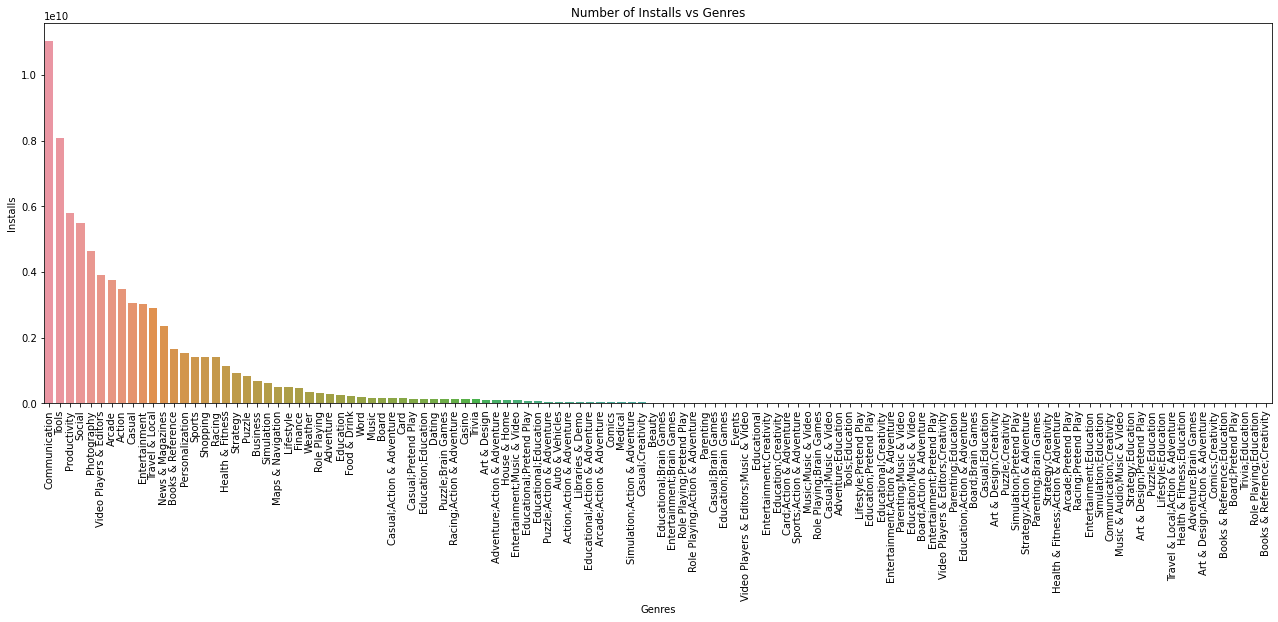

In [57]:
#Plotting Number of Installs vs Genres.
gen_install_df = ps_df.groupby(['Genres'])[['Installs']].sum().reset_index()
gen_install_df.sort_values(by = 'Installs', ascending = False, inplace = True)
plt.figure(figsize=(22,7))
plt.title("Number of Installs vs Genres")
sns.barplot(x = 'Genres', y = 'Installs', data = gen_install_df)
plt.xlabel("Genres")
plt.ylabel("Installs")
plt.xticks(rotation = 90)
plt.show()

**From the above graph we can infer that the top 5 Genres with most number of installs are - Communication, Tools, Productivity, Social & Photography.**

In [58]:
#Top 5 Genres with most number of installs -
gen_install_df.head()

,Genres,Installs
35,Communication,1.103928e+10
107,Tools,8.092772e+09
81,Productivity,5.788091e+09
100,Social,5.487868e+09
80,Photography,4.658148e+09


## **Graph 7 - Box plot to show Rating vs Genres**

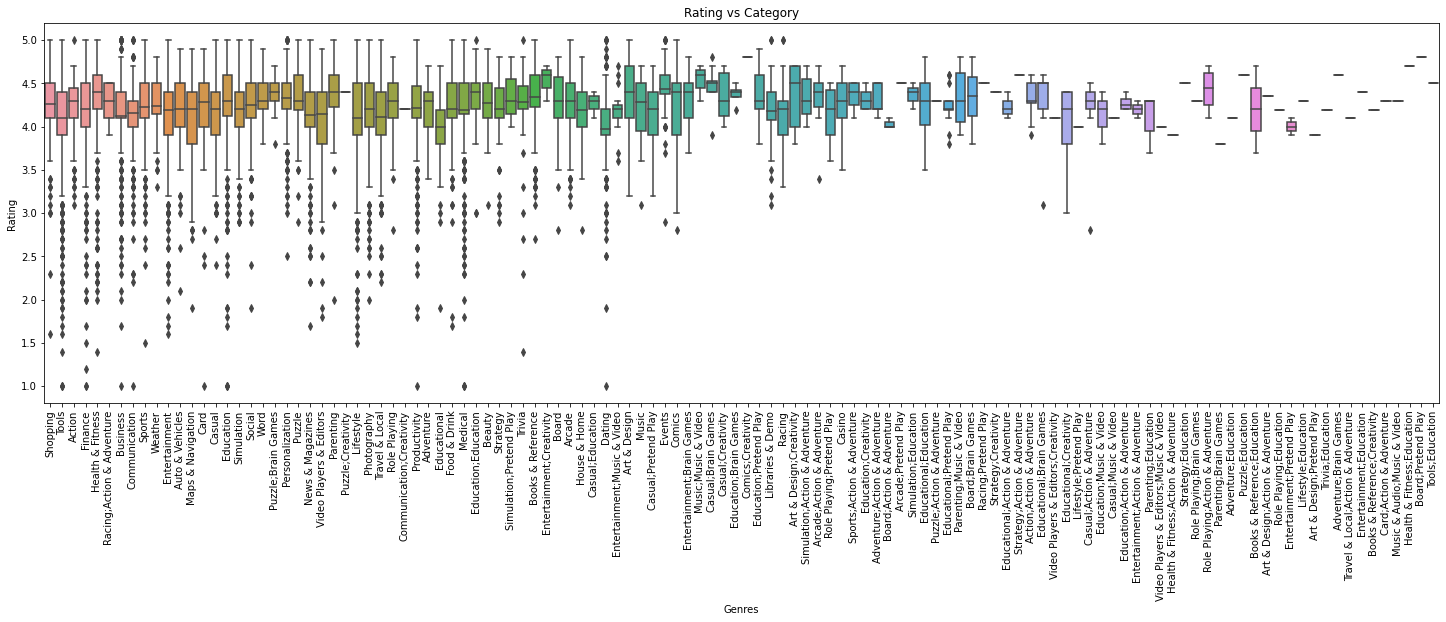

In [59]:
#Plotting box plot for Rating vs Genres.
plt.figure(figsize=(25,7))
sns.boxplot(x = ps_df['Genres'], y = ps_df['Rating'], data = ps_df, orient = 'v')
plt.title("Rating vs Category")
plt.xlabel("Genres")
plt.ylabel("Rating")
plt.xticks(rotation = 90)
plt.show()

In [60]:
# Checking the top 5 Genres with highest rating.
gen_rat_df = ps_df.groupby(['Genres'])['Rating'].median().reset_index(name = 'median')
gen_rat_df.sort_values(by ='median', ascending = False, inplace = True)
gen_rat_df.head()

,Genres,median
18,Board;Pretend Play,4.8
34,Comics;Creativity,4.8
63,Health & Fitness;Education,4.7
104,Strategy;Action & Adventure,4.6
73,Music;Music & Video,4.6


**The Top 5 Genres with highest ratings are - Board;Pretend Play, Comics;Creativity, Health & Fitness;Education, Strategy;Action & Adventure, Music;Music & Video.**

In [61]:
#Checking 5 Genres with worst rating.
gen_rat_df.tail()

,Genres,median
45,Educational,4.000000
37,Dating,3.970769
12,Art & Design;Pretend Play,3.900000
62,Health & Fitness;Action & Adventure,3.900000
76,Parenting;Brain Games,3.800000


**5 Genres with worst ratings are - Dating, Art & Design;Pretend Play, Health & Fitness; Action & Adventure, Parenting;Brain Games, No Genres.**

## **Graph 8 - Number of Apps vs Content Rating:**

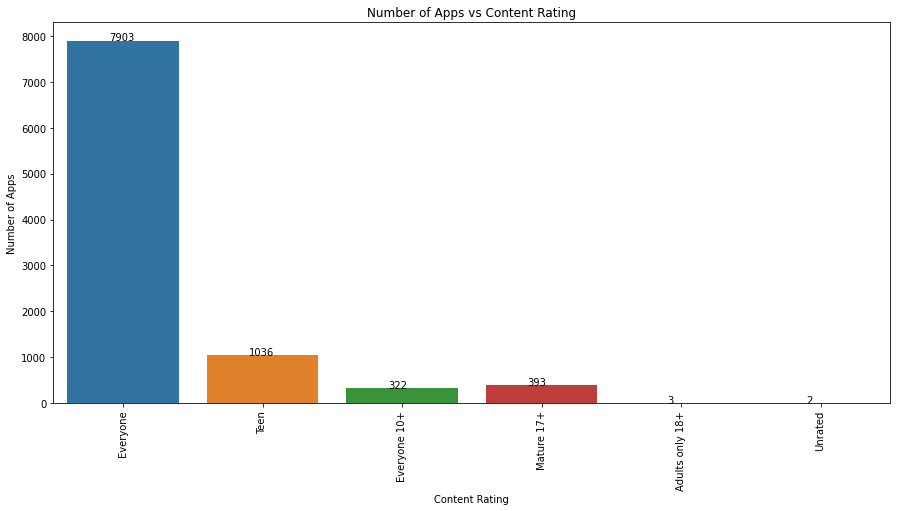

In [62]:
#Plotting Number of Apps vs Content Rating.
plt.figure(figsize=(15,7))
plt.title("Number of Apps vs Content Rating")
ax = sns.countplot(x = 'Content Rating', data = ps_df)
for p in ax.patches:
  ax.annotate(p.get_height(), (p.get_x()+0.3, p.get_height()+0.5))
plt.xlabel("Content Rating")
plt.ylabel("Number of Apps")
plt.xticks(rotation = 90)
plt.show()

**Most of the apps in the play store are with content rating Everyone.**

## **Graph 9 - Pie Chart for Percentage of Apps in each Content Rating**

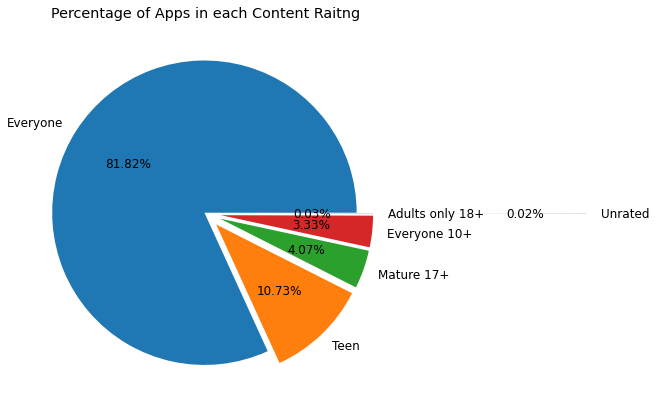

In [63]:
#Plotting pie chart to show the percentage of apps in each content rating.
plt.rcParams['font.size'] = 12
plt.figure(figsize = (7,7))
exp = (0.01,0.1,0.1,0.1,0.1,1.5)
ps_df['Content Rating'].value_counts().plot.pie(autopct = '%1.2f%%', explode = exp)
plt.title('Percentage of Apps in each Content Raitng')
plt.axis('off')
plt.show()

## **Graph 10 - Number of Installs vs Content Rating:**



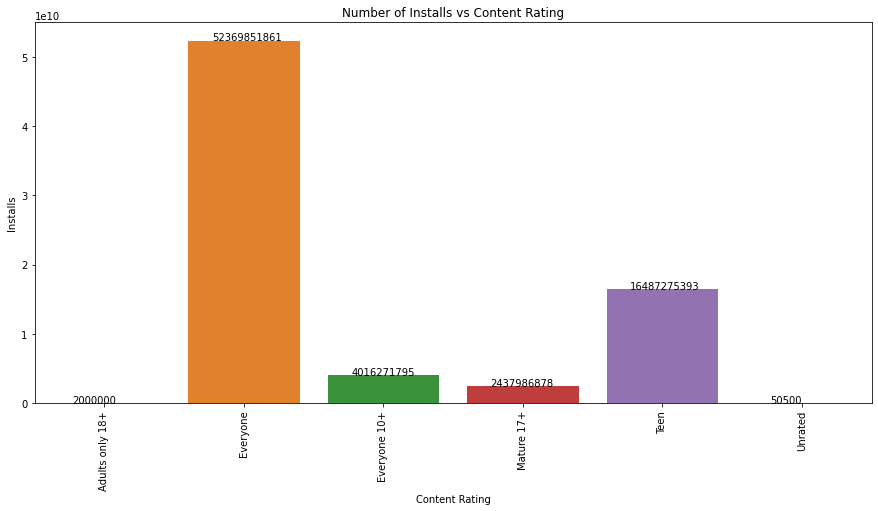

In [64]:
#Plotting Number of Installs vs Content Rating.
plt.rcParams['font.size'] = 10                          #Setting the font size back to 10 as we have changed the font to 12 in the code above.
cont = ps_df.groupby('Content Rating')
cont_install_df = cont[['Installs']].sum()
cont_install_df = cont_install_df.reset_index()
plt.figure(figsize=(15,7))
plt.title("Number of Installs vs Content Rating")
ax = sns.barplot(x = 'Content Rating', y = 'Installs', data = cont_install_df)
for p in ax.patches:
  ax.annotate(int(p.get_height()), (p.get_x()+0.17, p.get_height()+0.5))
plt.xlabel("Content Rating")
plt.ylabel("Installs")
plt.xticks(rotation = 90)
plt.show()

**Since there is huge amount of apps with content rating Everyone in the play store comapred to other content ratings therefore the number of installs are also much higher for apps with content rating everyone.**

## **Graph 11 - Box plot to show Rating vs Content Rating**

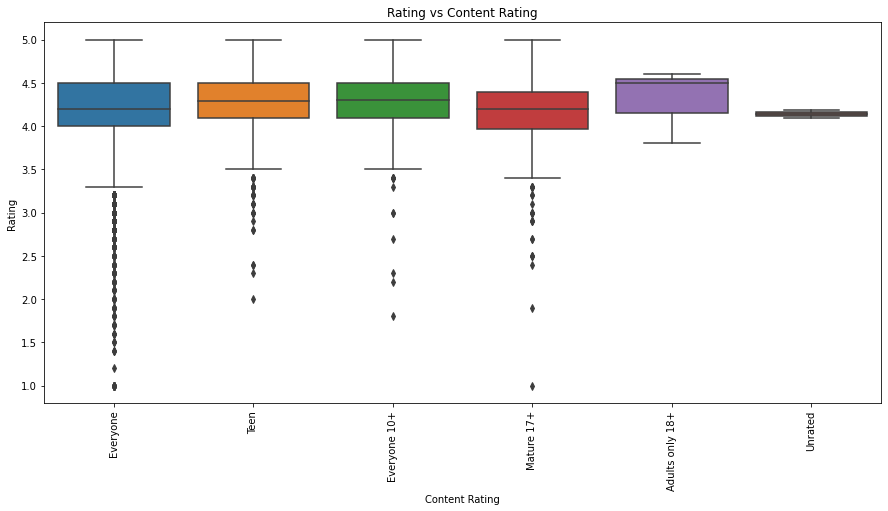

In [65]:
#Plotting box plot for Rating vs Content Rating.
plt.figure(figsize=(15,7))
sns.boxplot(x = ps_df['Content Rating'], y = ps_df['Rating'], data = ps_df, orient = 'v')
plt.title("Rating vs Content Rating")
plt.xlabel("Content Rating")
plt.ylabel("Rating")
plt.xticks(rotation = 90)
plt.show()

In [66]:
# Checking the median rating for each content rating.
con_rat_df = ps_df.groupby(['Content Rating'])['Rating'].median().reset_index(name = 'median')
con_rat_df.sort_values(by ='median', ascending = False, inplace = True)
con_rat_df

,Content Rating,median
0,Adults only 18+,4.500000
2,Everyone 10+,4.300000
4,Teen,4.286326
1,Everyone,4.200000
3,Mature 17+,4.200000
5,Unrated,4.146136


**Adults Only 18+ contents are having the highest ratings of 4.5 followed by Everyone 10+ with 4.3 then follows Teen with rating 4.2, Everyone with rating 4.2, Mature 17+ with rating 4.2 and Unrated with rating 4.1.**

## **Graph 12 - Pie Chart to find the percentage of Free apps and Paid apps.**


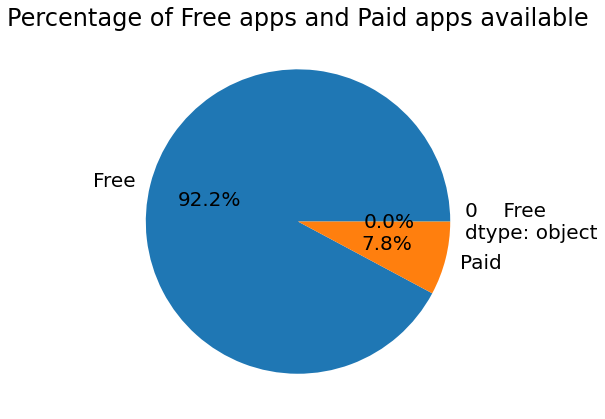

In [67]:
#Plotting pie chart.
plt.rcParams['font.size'] = 20
plt.figure(figsize = (7,7))
ps_df['Type'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.title('Percentage of Free apps and Paid apps available')
plt.axis('off')
plt.show()

## **Graph 13 - Bar Chart to show Number of Installs vs Category with Type of the app**

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


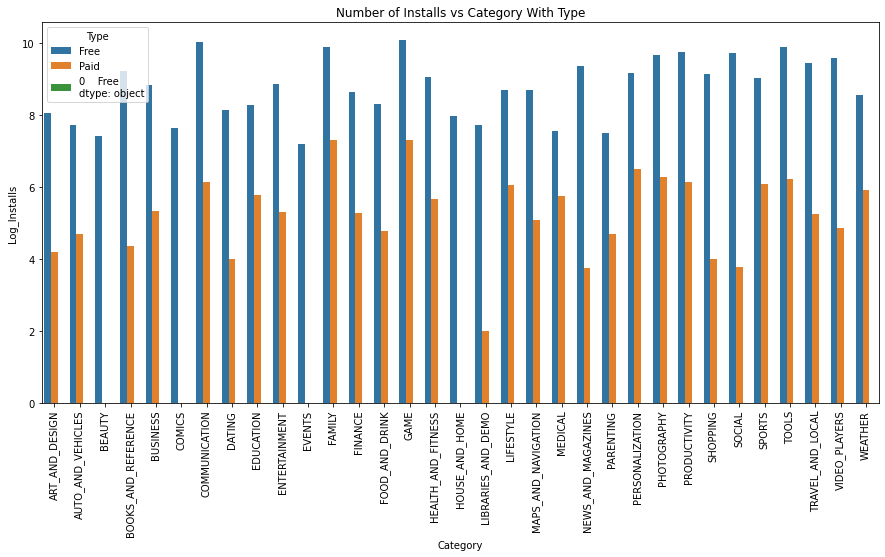

In [68]:
#Plotting Number of Installs vs Category with Type, Converting the number of Installs to log10 for better visualization.
plt.rcParams['font.size'] = 10                   #Setting the font size back to 10 as we have changed the font to 20 in the code above.
cat_type_install_df = ps_df.groupby(['Category','Type'])[['Installs']].sum().reset_index()
cat_type_install_df['Log_Installs'] = np.log10(cat_type_install_df['Installs'])
plt.figure(figsize=(15,7))
plt.title("Number of Installs vs Category With Type")
sns.barplot(x = 'Category', y = 'Log_Installs', hue = 'Type', data = cat_type_install_df)
plt.xlabel("Category")
plt.ylabel("Log_Installs")
plt.xticks(rotation = 90)
plt.show()

**From the above graph it is evident that users are installing more of the Free apps from play store as compared to the Paid apps.**

## **Graph 14 - Reviews vs Category**

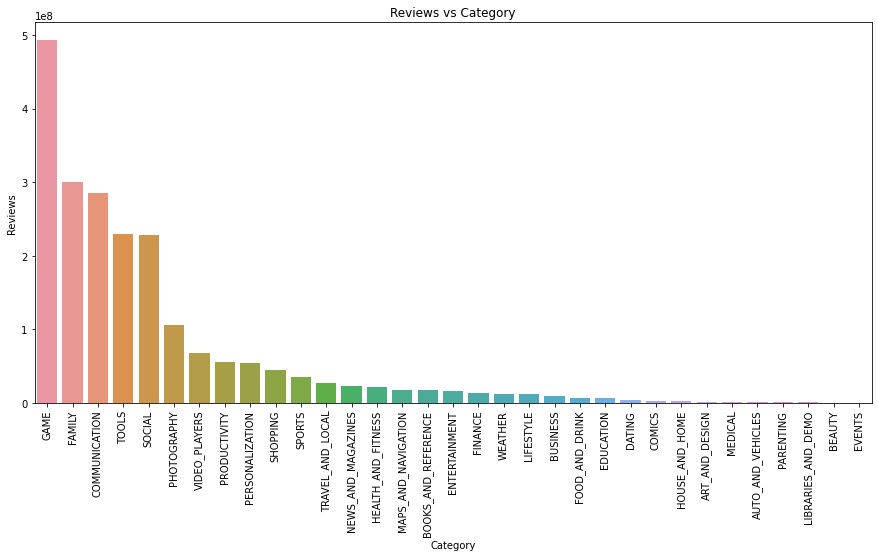

In [69]:
#Plotting Number of Reviews vs Category.
cat_rev_df = ps_df.groupby(['Category'])[['Reviews']].sum().reset_index()
cat_rev_df.sort_values(by = 'Reviews', ascending = False, inplace = True)
plt.figure(figsize=(15,7))
plt.title("Reviews vs Category")
sns.barplot(x = 'Category', y = 'Reviews', data = cat_rev_df)
plt.xlabel("Category")
plt.ylabel("Reviews")
plt.xticks(rotation = 90)
plt.show()

**From the above graph we can make out that the top 5 categories having most number of reviews in the play store are - GAME, FAMILY, COMMUNICATION, TOOLS & SOCIAL.**

In [70]:
# Extracting the number of reviews for the top 5 categories.
cat_rev_df.head()

,Category,Reviews
14,GAME,492674658
11,FAMILY,300470581
6,COMMUNICATION,285822656
29,TOOLS,229421133
27,SOCIAL,227849931


## **Graph 15 - Distribution of Size**

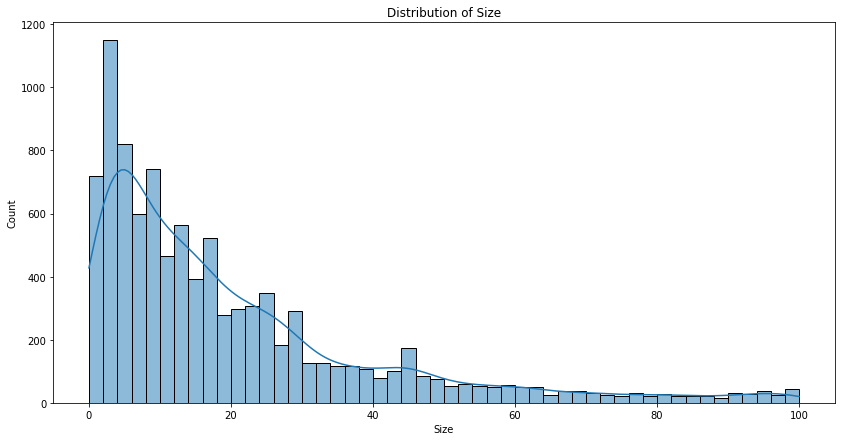

In [71]:
#Plotting distribution of size.
plt.figure(figsize=(14,7))
plt.title("Distribution of Size")
sns.histplot(ps_df['Size'], kde = True)
plt.show()

**From the above graph we can infer that most of the apps are of smaller size.**

## **Graph 16 - Number of Apps vs Android Version**

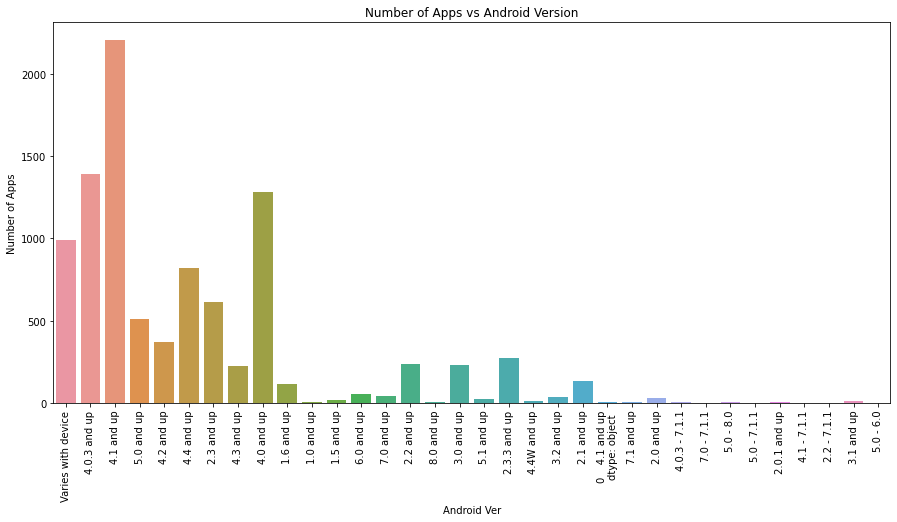

In [72]:
#Plotting Number of Apps vs Android Version.
plt.figure(figsize=(15,7))
plt.title("Number of Apps vs Android Version")
sns.countplot(x = 'Android Ver', data = ps_df)
plt.xlabel("Android Ver")
plt.ylabel("Number of Apps")
plt.xticks(rotation = 90)
plt.show()

**From the above graph we can infer that most of the apps are running at Android Version 4.1 and above.**

In [73]:
#Correlation matrix for Play Store data set.
ps_df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.054605,0.056856,0.039667,-0.01953
Reviews,0.054605,1.000000,0.077477,0.625081,-0.00759
Size,0.056856,0.077477,1.000000,0.043533,-0.02176
Installs,0.039667,0.625081,0.043533,1.000000,-0.00941
Price,-0.019530,-0.007590,-0.021760,-0.009410,1.00000


## **Graph 17 - Correlation heat map for the play store dataset.**

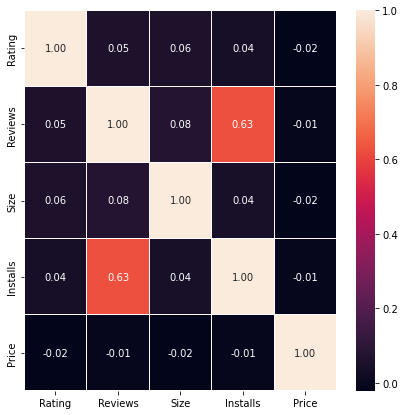

In [74]:
#Plotting correlation heat map for the play store dataset.
plt.figure(figsize = (7,7))
sns.heatmap(ps_df.corr(), annot = True, linewidths = 0.1, fmt = '0.2f')
plt.show()

## **Now merging the User Review dataset with the Play Store dataset.**

In [75]:
#Merging the User Review dataset with Play Store dataset in a new dataframe with name final_ps_df.
final_ps_df = ps_df.merge(ur_df, on = 'App')
final_ps_df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
21786,Candy Bomb,FAMILY,4.4,42145,20.0,10000000.0,Free,0.0,Everyone,Casual;Brain Games,2018-07-04,2.9.3181,4.0.3 and up,Exciting,Positive,0.300,0.800000
30577,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
33746,Banfield Pet Health Tracker,MEDICAL,4.2,1747,5.9,100000.0,Free,0.0,Everyone,Medical,2016-10-17,1.2.2,4.0 and up,Could much more. I wish widget showed upcoming...,Positive,0.125,0.313889
20369,"Free Dating App - YoCutie - Flirt, Chat & Meet",DATING,4.1,97684,7.9,1000000.0,Free,0.0,Mature 17+,Dating,2018-07-10,1.230,4.0.3 and up,Still trying figure Good Bad app. is. After I ...,Positive,0.250,0.597917
11448,BBW Dating & Plus Size Chat,DATING,4.4,12632,29.0,1000000.0,Free,0.0,Mature 17+,Dating,2018-07-27,3.5.0.1,4.1 and up,So far good,Positive,0.400,0.800000


**There are three main columns in the User Review dataset - Sentiment, Sentiment_Polarity and Sentiment_Subjectivity.**
  * Sentiment is the view or opinion of the user about the app. So, the view/opinion may be Positive, Negative or Neutral.
  * Sentiment_Polarity column contains values from -1 to 1. Where -1 is the most negative polarity and 1 is the most positive polarity. This column can also contain 0 which means neutral polarity.
  * Sentiment_Subjectivity contains values ranging from 0 to 1. Where 0 being the very much objective sentence and 1 is very much subjective. Subjectivity refers to the degree to which a person is personally involved in an object.

## **Graph 18 - Pie Chart for Sentiment**

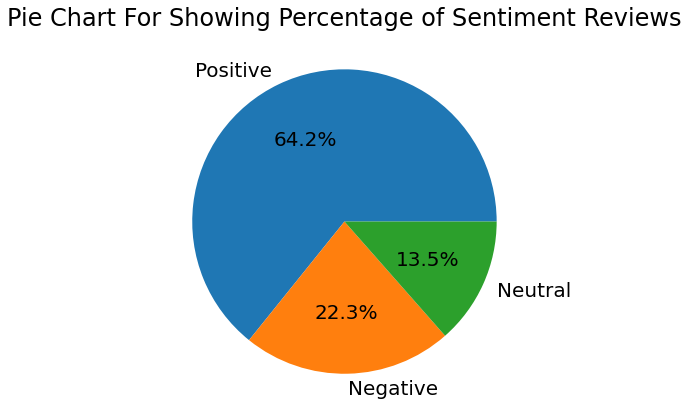

In [76]:
#Plotting pie chart for Sentiment.
plt.rcParams['font.size'] = 20
plt.figure(figsize = (7,7))
final_ps_df['Sentiment'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.title('Pie Chart For Showing Percentage of Sentiment Reviews')
plt.axis('off')
plt.show()

**The above graph shows that there are 64.2% positive reviews, 13.5% Neutral reviews and 22.3% Negative reviews.**

## **Graph 19 - Distribution of Sentiment Polarity**

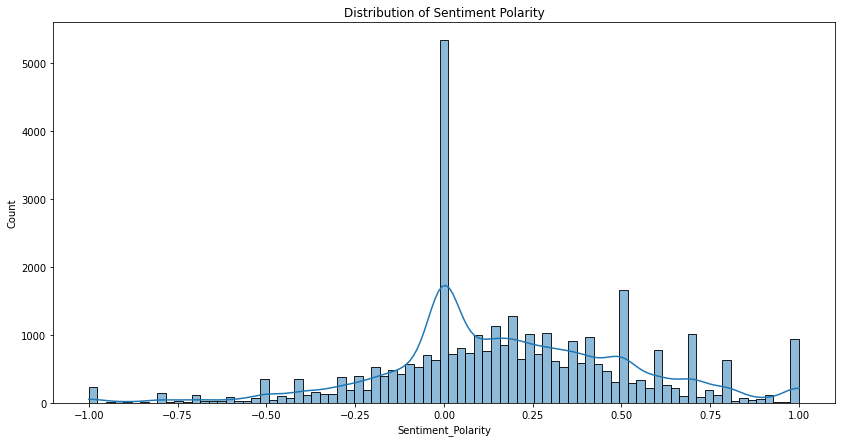

In [77]:
#Plotting distribution of Sentiment Polarity.
plt.rcParams['font.size'] = 10               #Setting the font size back to 10 as we have changed the font to 20 in the code above.
plt.figure(figsize=(14,7))
plt.title("Distribution of Sentiment Polarity")
sns.histplot(final_ps_df['Sentiment_Polarity'], kde = True)
plt.show()

**The above graph shows that the width of the distribution is more towards the left of the graph which makes it left skewed. So, the Polarity of most of the users is towards the positive side as we already saw in the pie chart. Also, most of the reviews are having 0 polarity.**

## **Graph 20 - Histogram plot of Sentiment Subjectivity**

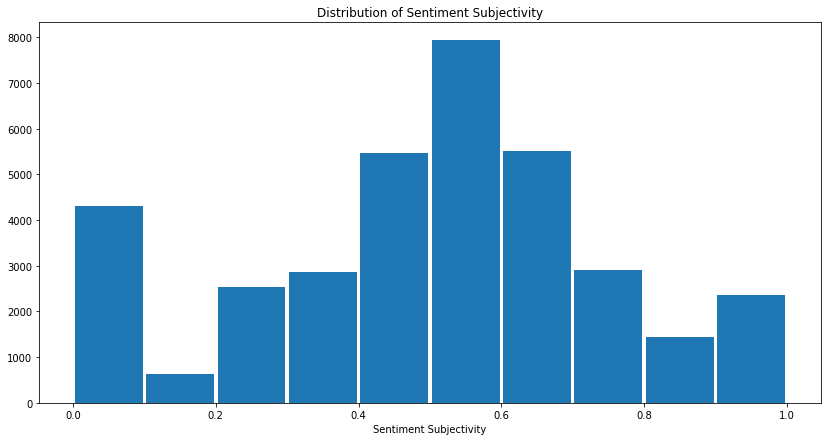

In [78]:
#Plotting distribution of Sentiment Polarity.
plt.figure(figsize=(14,7))
plt.title("Distribution of Sentiment Subjectivity")
plt.hist(final_ps_df['Sentiment_Subjectivity'], rwidth = 0.95)
plt.xlabel("Sentiment Subjectivity")
plt.show()

**From the above histogram plot we can infer that most the sentiment subjectivity lies between 0.4 to 0.7 which shows that most of the reviews are towards subjective point of view of the users.**

In [79]:
cat_sent_df = final_ps_df.groupby(['Category', 'Sentiment']).size().reset_index().pivot(columns = 'Sentiment', index = 'Category', values = 0)
cat_sent_df.head()

Sentiment,Negative,Neutral,Positive
Category,,,
ART_AND_DESIGN,61,62,259
AUTO_AND_VEHICLES,17,36,236
BEAUTY,65,88,185
BOOKS_AND_REFERENCE,95,108,448
BUSINESS,167,258,654


## **Graph 21 - Number of Apps vs Category with Reviews Sentiment Stacking**




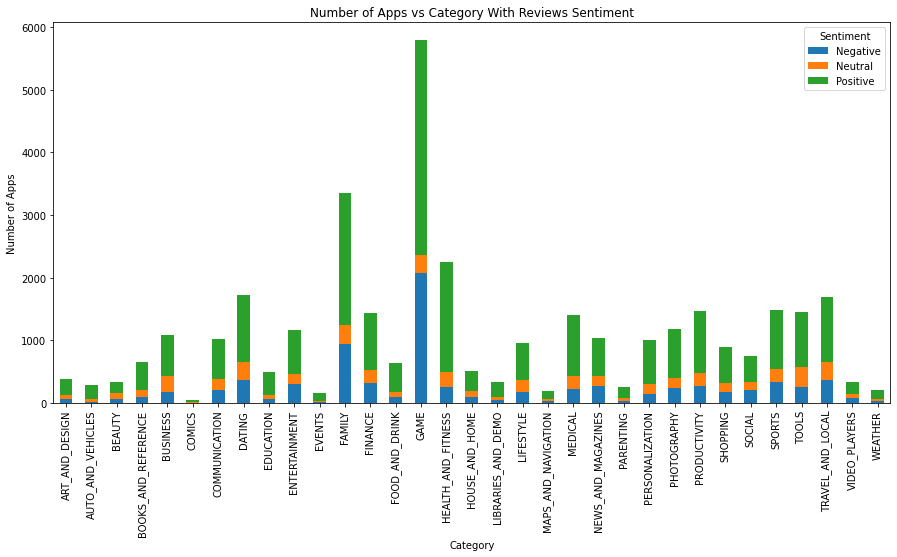

In [80]:
#Plotting Number of Apps vs Category with Reviews Sentiment Stacking.
cat_sent_df.plot(kind = 'bar', stacked = True, figsize=(15,7))
plt.title("Number of Apps vs Category With Reviews Sentiment")
plt.xlabel("Category")
plt.ylabel("Number of Apps")
plt.show()

In [81]:
#Top 5 Categories most positive reviews -
pos_rev_app_df = cat_sent_df.sort_values(by ='Positive', ascending = False).drop(['Negative','Neutral'], axis = 1)
pos_rev_app_df.head()

Sentiment,Positive
Category,
GAME,3423
FAMILY,2111
HEALTH_AND_FITNESS,1754
DATING,1068
TRAVEL_AND_LOCAL,1034


**The Top 5 Categories with most positive reviews are - GAME, FAMILY, HEALTH_AND_FITNESS, DATING, TRAVEL_AND_LOCAL.**

In [82]:
#Worst 5 Categories with most negative reviews -
neg_rev_app_df = cat_sent_df.sort_values(by ='Negative', ascending = False).drop(['Positive','Neutral'], axis = 1)
neg_rev_app_df.head()

Sentiment,Negative
Category,
GAME,2082
FAMILY,944
TRAVEL_AND_LOCAL,367
DATING,361
SPORTS,337


**5 Categories with most negative reviews are - GAME, FAMILY, TRAVEL_AND_LOCAL, DATING & SPORTS. GAME and FAMILY are common in the above two list, both these categories are having positive reviews as well as negative reviews.**

## **Graph 22 - Correlation heat map for the final play store dataset.**

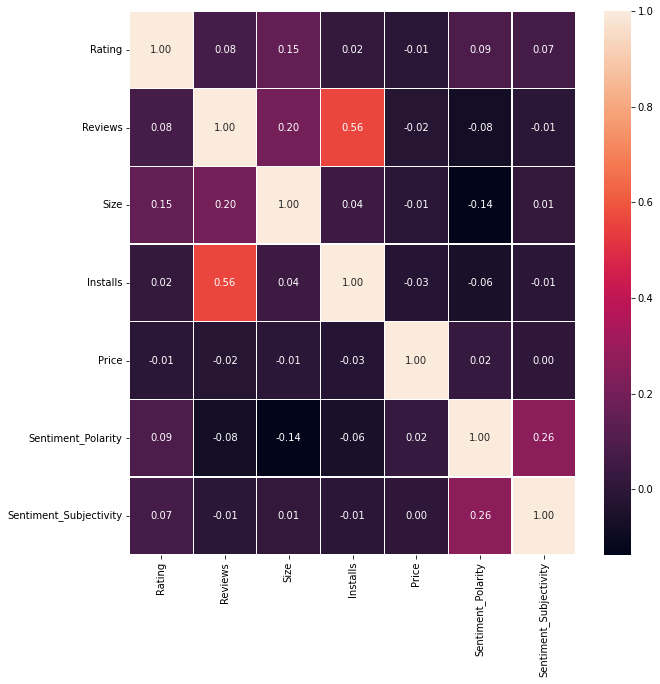

In [83]:
#Plotting correlation heat map for the final play store dataset.
plt.figure(figsize = (10,10))
sns.heatmap(final_ps_df.corr(), annot = True, linewidths = 0.1, fmt = '0.2f')
plt.show()

# **Some more insights to the dataset.**

**5 apps which are most costly in the play store -**

In [84]:
#Checking the top 5 most costly apps.
cost_app_df = ps_df.sort_values(by ='Price', ascending = False)
cost_app_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.300,10000.0,Paid,400.00,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,0.965,5000.0,Paid,399.99,Everyone,Finance,2017-05-01,3.4,4.4 and up
5358,I am Rich!,FINANCE,3.8,93,22.000,1000.0,Paid,399.99,Everyone,Finance,2017-12-11,1.0,4.1 and up
4197,most expensive app (H),FAMILY,4.3,6,1.500,100.0,Paid,399.99,Everyone,Entertainment,2018-07-16,1.0,7.0 and up
5351,I am rich,LIFESTYLE,3.8,3547,1.800,100000.0,Paid,399.99,Everyone,Lifestyle,2018-01-12,2.0,4.0.3 and up


**5 most reviewed apps in the playstore -**

In [85]:
#Checking the top 5 most reviewed apps.
most_rev_app_df = ps_df.sort_values(by ='Reviews', ascending = False)
most_rev_app_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,17.681871,1.000000e+09,Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,11.766706,1.000000e+09,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,17.681871,1.000000e+09,Free,0.0,Teen,Social,2018-07-31,Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,11.766706,1.000000e+09,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device
3986,Clash of Clans,FAMILY,4.6,44881447,98.000000,1.000000e+08,Free,0.0,Everyone 10+,Strategy,2018-07-15,10.322.16,4.1 and up


**Apps with rating 5.0 -**

In [86]:
#Checking apps with rating 5.0
ps_df[ps_df['Rating'] == 5.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10301,"FD Calculator (EMI, SIP, RD & Loan Eligilibility)",FINANCE,5.0,104,2.300,1000.0,Free,0.00,Everyone,Finance,2018-08-07,2.1.0,4.1 and up
9089,DYPSOET,FAMILY,5.0,8,7.400,50.0,Free,0.00,Everyone,Education,2018-08-07,1.0.2,4.1 and up
7698,CP Trivia,GAME,5.0,5,12.000,100.0,Free,0.00,Everyone,Trivia,2018-08-06,0.99,5.0 and up
5685,Jobs in Canada - Emplois au Canada,BUSINESS,5.0,2,14.000,1000.0,Free,0.00,Teen,Business,2018-08-05,1.1,4.2 and up
7147,CB Heroes,SOCIAL,5.0,5,1.800,5.0,Free,0.00,Everyone,Social,2018-08-04,1.2.4,5.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7477,USMLE Step 2 CK Flashcards,FAMILY,5.0,1,40.000,10.0,Paid,19.99,Everyone,Education,2014-05-26,2.47,2.2 and up
7100,CA Speakers,LIFESTYLE,5.0,12,1.200,100.0,Paid,0.99,Teen,Lifestyle,2014-03-25,1.0,3.0 and up
8601,DN Calculators,FINANCE,5.0,12,0.775,100.0,Free,0.00,Everyone,Finance,2013-09-05,1.11,3.0 and up
5482,meStudying: AP English Lit,FAMILY,5.0,1,0.655,10.0,Paid,4.99,Everyone,Education,2013-08-31,1.3,2.0.1 and up


**There are 271 apps in the play store with 5 rating.**

**Apps with worst rating -**

In [87]:
#Checking apps with worst rating.
ps_df[ps_df['Rating'] == 1.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
625,House party - live chat,DATING,1.0,1,9.2,10.0,Free,0.00,Mature 17+,Dating,2018-07-31,3.52,4.0.3 and up
10324,FE Mechanical Engineering Prep,FAMILY,1.0,2,21.0,1000.0,Free,0.00,Everyone,Education,2018-07-27,5.33.3669,5.0 and up
10400,Familial Hypercholesterolaemia Handbook,MEDICAL,1.0,2,33.0,100.0,Free,0.00,Everyone,Medical,2018-07-02,2.0.1,4.1 and up
6319,BJ Bridge Standard American 2018,GAME,1.0,1,4.9,1000.0,Free,0.00,Everyone,Card,2018-05-21,6.2-sayc,4.0 and up
8875,DT future1 cam,TOOLS,1.0,1,24.0,50.0,Free,0.00,Everyone,Tools,2018-03-27,3.1,2.2 and up
8820,DS Creator 2.0,TOOLS,1.0,2,4.4,500.0,Free,0.00,Everyone,Tools,2018-03-23,2.0.180226.1,4.0 and up
7383,Thistletown CI,PRODUCTIVITY,1.0,1,6.6,100.0,Free,0.00,Everyone,Productivity,2018-03-15,41.9,4.1 and up
10591,Lottery Ticket Checker - Florida Results & Lotto,TOOLS,1.0,3,41.0,500.0,Free,0.00,Everyone,Tools,2017-12-12,1.0,4.2 and up
7427,CJ DVD Rentals,COMMUNICATION,1.0,5,13.0,100.0,Free,0.00,Everyone,Communication,2017-10-06,1.0,4.1 and up
7926,Tech CU Card Manager,FINANCE,1.0,2,7.2,1000.0,Free,0.00,Everyone,Finance,2017-07-25,1.0.1,4.0 and up


**There are 16 apps with worst rating of 1.0 in the play store.**

**5 most installed apps from the playstore -**

In [88]:
#Checking the top 5 most installed apps.
most_ins_app_df = ps_df.sort_values(by ='Installs', ascending = False)
most_ins_app_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3687,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384,16.084580,1.000000e+09,Free,0.0,Teen,Video Players & Editors,2018-08-06,Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324,11.766706,1.000000e+09,Free,0.0,Everyone,Communication,2018-08-02,Varies with device,Varies with device
341,Hangouts,COMMUNICATION,4.0,3419249,11.766706,1.000000e+09,Free,0.0,Everyone,Communication,2018-07-21,Varies with device,Varies with device
3232,Google Street View,TRAVEL_AND_LOCAL,4.2,2129707,24.654495,1.000000e+09,Free,0.0,Everyone,Travel & Local,2018-08-06,Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,11.766706,1.000000e+09,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device


**Top 5 Apps with most positive reviews.**

In [89]:
# checking the top 5 apps with most positive reviews.
pos_rev = ur_df[ur_df['Sentiment'] == 'Positive']
pos_rev_ar = pos_rev.groupby(['App'])[['Sentiment']].count().reset_index()
pos_rev_ar.sort_values(by = 'Sentiment', ascending = False, inplace = True)
pos_rev_ar.head()

,App,Sentiment
805,Helix Jump,209
502,Duolingo: Learn Languages Free,200
324,Calorie Counter - Macros,174
325,Calorie Counter - MyFitnessPal,169
256,Bowmasters,169


**5 Apps with most negative reviews.**

In [90]:
# 5 apps with most negative reviews.
neg_rev = ur_df[ur_df['Sentiment'] == 'Negative']
neg_rev_ar = neg_rev.groupby(['App'])[['Sentiment']].count().reset_index()
neg_rev_ar.sort_values(by = 'Sentiment', ascending = False, inplace = True)
neg_rev_ar.head()

,App,Sentiment
103,Angry Birds Classic,147
298,Candy Crush Saga,126
236,Bowmasters,119
19,8 Ball Pool,106
299,Candy Crush Soda Saga,96


# **Conslusion**

In this EDA the given datasets are analysed and several graphs has been plotted which can be used to give more insights to the dataset.

Family category has the greatest number of apps present in the play store. Game category is the most installed and reviewed from the play store although the number of apps in Game category is almost half of the number of apps in Family category. This shows that the categories which are more entertaining will do better instead of having lower number of apps present. Events category has the maximum ratings of around 4.44.

The most installed apps are from Communication Genres.

Most of the apps present in the play store are available for everyone, there are very few apps which are having age restrictions. Also, we can see the Content Rating Teen is having a quite good number of installs which shows that the present youths are quite good at operating apps and thus developers can develop more apps which suits to the interest of the teens.

There are more free apps present in the play store than the paid apps and also, quite evident users prefer to install free apps more as compared to the paid apps this gives direction that the developers can launch more of the free apps and for earning money, they can use other means such as through advertisements in the apps or monetizing certain section of the app which serves certain special purpose or any other means.

Game category has a greater number of positive reviews as well as negative reviews since there is more installs from the Game category.

From the correlation matrix we can infer that reviews and installs are having a good correlation which is quite evident as the more the number of installs more will be the number of reviews. Also, Sentiment Polarity and Sentiment Subjectivity are somewhat correlated.